In [115]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
kps = tf.cast(tf.random.uniform(shape=[14, 2], minval=0, maxval=160, dtype=tf.int32), tf.float32)

In [17]:
SKELETON = [(0, 1), (1, 2), (12, 2), (12, 3), (3, 4), (4, 5), (6, 7),
            (7, 8), (8, 12), (12, 9), (9, 10), (10, 11), (12, 13)]

In [35]:
sks = tf.stack([tf.gather(kps, sk_idxs) for sk_idxs in SKELETON], axis=0)
d   = tf.sqrt(tf.pow(sks[:,0,0] - sks[:,1,0], 2) + tf.pow(sks[:,0,1] - sks[:,1,1], 2))
sks.shape, d.shape

(TensorShape([13, 2, 2]), TensorShape([13]))

In [64]:
def l2_distance(p1, p2):
    """ 
    Computes the Euclidean distance between two points p1 and p2 in tensorflow.
    Args:
        p1: shape [B, P, 2]
        p2: shape [B, P, 2]
    Returns:
        l2_distance: shape [B, P]
    E.g.
        l2_distance(tf.constant([[1,2],[3,4]]), tf.constant([[1,1],[1,1]]))
    """
    p1 = tf.cast(p1, tf.float32)
    p2 = tf.cast(p2, tf.float32)
    return tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(p1, p2)), 2))

# EXample:
p1 = tf.constant([[5, 6], [1,2],[3,4]]); p2 = tf.constant([[5, 5],[1,1],[1,1]])
p1 = tf.expand_dims(p1, 0); p2 = tf.expand_dims(p2, 0)
print(p1.shape, p2.shape)
print('distance:',l2_distance(p1, p2))

(1, 3, 2) (1, 3, 2)
distance: tf.Tensor([[1.        1.        3.6055512]], shape=(1, 3), dtype=float32)


In [58]:
l2_distance(sks[:,0,:],sks[:,1,:])

<tf.Tensor: shape=(13,), dtype=float32, numpy=
array([ 34.205257 ,  13.1529455,  60.00833  ,  40.81666  ,  86.127815 ,
       156.92354  , 105.550934 ,  97.00515  ,  71.19691  ,  54.378304 ,
       121.82774  , 122.57651  ,  67.95587  ], dtype=float32)>

In [107]:
def middle_point(l):
    """ Computes middle point of a line in tensorflow.
    Args:
        l: shape [batch_size, num_points, 2, 2].
    Returns:
        p_mid: shape [batch_size, num_points, 2].              
    """
    p1 = l[:, :, 0, :]
    p2 = l[:, :, 1, :]
    p_mid = (p1 + p2) / 2
    return p_mid
    
p_mid = middle_point(sks[None,])
p_mid

<tf.Tensor: shape=(1, 13, 2), dtype=float32, numpy=
array([[[ 31.5,  97.5],
        [ 35.5, 112. ],
        [ 56.5, 101. ],
        [ 94.5, 106.5],
        [ 63.5, 135.5],
        [ 62. ,  79.5],
        [ 71.5,  32. ],
        [ 70.5,  54.5],
        [ 53. ,  71.5],
        [107. , 103.5],
        [ 84.5,  77.5],
        [ 99. ,  49.5],
        [ 55.5,  70.5]]], dtype=float32)>

In [111]:
l2_distance(p_mid, p_mid+2*tf.random.normal(shape=p_mid.shape))

<tf.Tensor: shape=(1, 13), dtype=float32, numpy=
array([[5.7350497 , 2.3715541 , 2.7002544 , 1.2125428 , 2.0842445 ,
        0.23892768, 3.5323007 , 3.2010846 , 5.0361056 , 0.6863301 ,
        3.349906  , 1.4260238 , 0.31544718]], dtype=float32)>

In [26]:
# def distance(point1, point2):
#     l2_norm = tf.norm(point1-point2, ord='euclidean')
#     return l2_norm
# distance(sk[0],sk[1])

<tf.Tensor: shape=(), dtype=float32, numpy=34.20526>

In [68]:
sks.shape

TensorShape([13, 2, 2])

In [87]:
def angle(l1, l2):
    """ Calculate angle between two lines in tensorflow.
    Args:
        l1: tensor of shape [batch_size, num_points, 2, 2]
        l2: tensor of shape [batch_size, num_points, 2, 2]
    Returns:
        tensor of shape [batch_size, num_points]                       
    """
    l1 = l1[:, :, 0, :] - l1[:, :, 1, :]
    l2 = l2[:, :, 0, :] - l2[:, :, 1, :]
    l1_norm = tf.sqrt(tf.reduce_sum(tf.square(l1), axis=-1, keepdims=True))
    l2_norm = tf.sqrt(tf.reduce_sum(tf.square(l2), axis=-1, keepdims=True))
    l1 = tf.math.divide_no_nan(l1,l1_norm)
    l2 = tf.math.divide_no_nan(l2,l2_norm)
    angle = tf.reduce_sum(tf.multiply(l1, l2), axis=-1)
    print(angle)
    angle = tf.acos(angle)
    return angle

# l1 = tf.constant([[1, 0], [0, 1], [1, 0], [0, 1]], dtype=tf.float32)[None,]
# l2 = tf.constant([[1, 0], [0, 1], [1, 0], [0, 1]], dtype=tf.float32)[None,]
l1 = sks[None,]+2*tf.random.normal(shape=[1,2,2])
l2 = sks[None,]
print(l1.shape, l2.shape)
angle(l1, l2)*180/tf.constant(np.pi)


(1, 13, 2, 2) (1, 13, 2, 2)
tf.Tensor(
[[0.9971451  0.99941194 0.99977505 0.9976943  0.999947   0.9998433
  0.99991965 1.         0.9997661  0.99951273 0.9998657  0.99998885
  0.9997275 ]], shape=(1, 13), dtype=float32)


<tf.Tensor: shape=(1, 13), dtype=float32, numpy=
array([[4.330472  , 1.9650315 , 1.2153091 , 3.891538  , 0.58983487,
        1.0143285 , 0.72631586, 0.        , 1.2392263 , 1.7887069 ,
        0.93899465, 0.2705197 , 1.3376442 ]], dtype=float32)>

In [73]:
sks.shape

TensorShape([13, 2, 2])

In [106]:
def angle(l1, l2):
    """ Calculate angle between two lines using tf.atan tensorflow.
    Args:
        l1: tensor of shape [batch_size, num_points, 2, 2]
        l2: tensor of shape [batch_size, num_points, 2, 2]
    Returns:
        tensor of shape [batch_size, num_points] 
    """
    l11 = l1[:, :, 0, :] # first point of l1
    l12 = l1[:, :, 1, :] # second point of l1
    l21 = l2[:, :, 0, :] # first point of l2
    l22 = l2[:, :, 1, :] # second point of l2

    m1 = (l12[...,1] - l11[...,1]) / (l12[...,0] - l11[...,0]) # theta = atan((y2 - y1) / (x2 - x1))
    angle1 = tf.atan(m1)

    m2 = (l22[...,1] - l21[...,1]) / (l22[...,0] - l21[...,0])
    angle2 = tf.atan(m2)

    return tf.abs(angle1 - angle2)

l1 = sks[None,]+2*tf.random.normal(shape=[1,2,2], seed=10)
l2 = sks[None,]
print(l1.shape, l2.shape)
angle(l1, l2)*180/tf.constant(np.pi)


(1, 13, 2, 2) (1, 13, 2, 2)


<tf.Tensor: shape=(1, 13), dtype=float32, numpy=
array([[3.2594924 , 4.4772916 , 0.41407168, 2.739944  , 0.46486267,
        0.27947083, 0.9262436 , 0.698641  , 1.4128435 , 1.8848213 ,
        0.9001677 , 0.6685577 , 1.552461  ]], dtype=float32)>

In [140]:
def point_to_heatmap(KPS, height=160, width= 120, probability_descending_slope = 10):
    KPS = tf.constant(KPS, dtype=tf.float32)
    X = KPS[:, 0]
    Y = KPS[:, 1]
    assert (X.shape==Y.shape), 'Invalid Key-point matrix shape'
    
    def exp_square(z, peak_z, taw = probability_descending_slope):
        return tf.math.exp((-1)*taw*(z[0]-peak_z[0])**2/width), tf.math.exp((-1)*taw*(z[1]-peak_z[1])**2/height)
    
    keypoints= X.shape[0]
    mask = tf.ones((height, width, keypoints), dtype= tf.float32)
    hms = []
    for i in tf.range(keypoints):
        temp_x = tf.cast( tf.linspace(0,width-1, width), tf.float32)
        temp_y = tf.cast(tf.linspace(0,height-1, height), tf.float32)
        temp_x, temp_y = exp_square([temp_x, temp_y], [X[i], Y[i]])
        hm = mask[:,:,i] * np.reshape(temp_x,(1,-1)) * np.reshape(temp_y,(-1,1))
        hms.append(hm)
    hms = tf.stack(hms, axis=-1)
    hms = hms*tf.cast(hms>=0.1, tf.float32) # removing values less than 0.1
    hms = tf.cast(hms*255, tf.uint8)
    return hms

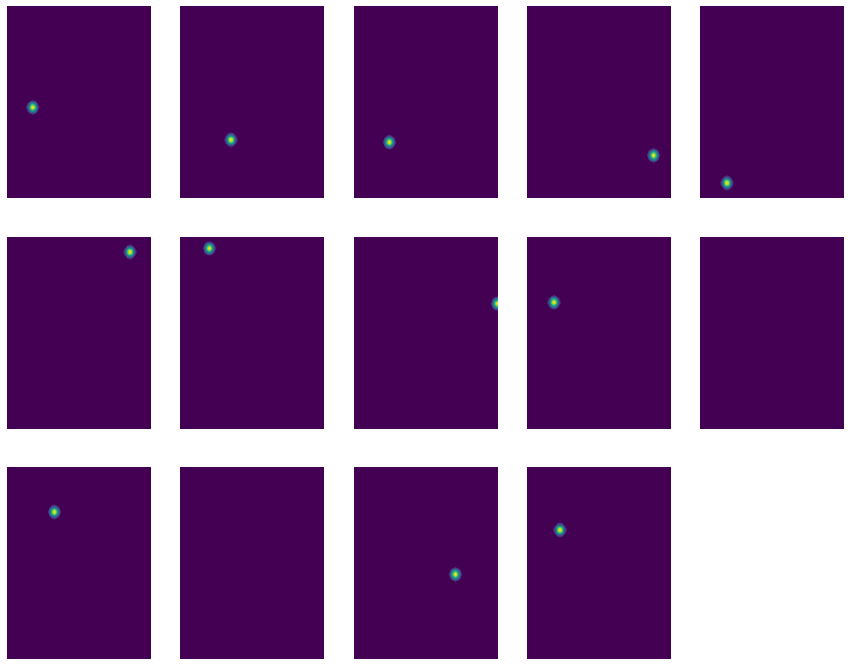

In [141]:
X= [20, 30, 40, 50, 30, 70, 100, 100, 60,  50,  60, 44,  88, 66 ]
Y= [30, 40, 50, 90, 44, 88,  66,  77, 29, 133, 144, 111, 20, 30 ]
KPS = kps
mask = point_to_heatmap(KPS, probability_descending_slope = 10)  
# lowering 'probability_descending_slope' will make the masks more spread out;
# and gradually increasing it will make it converge into a single point ... Try it out to see.
# Remains good between (1 to 4)

plt.figure(figsize=(15,12))
for i in range(14):
    
#     mask = (mask*255.0).astype(np.uint8)
    plt.subplot(3,5,i+1), plt.imshow(mask[:,:,i])
    plt.axis('off')

In [131]:
tf.unravel_index(tf.argmax(mask[...,0], axis=None), mask[...,0].shape)

<tf.Tensor: shape=(2, 120), dtype=int64, numpy=
array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 81, 82, 83, 83, 84, 84,
        84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 83, 83, 82,
        81,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [156]:
tf.unravel_index(tf.math.argmax(tf.reshape(mask[...,1], -1)), mask[...,1].shape)

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([111,  42])>

In [157]:
np.unravel_index(np.argmax(mask[...,1]), mask[...,1].shape)

(111, 42)

In [136]:
mask[...,0].shape

TensorShape([160, 120])